<a href="https://colab.research.google.com/github/sodiq-sulaimon/Preparations-for-TensorFlow-Developer-Certification/blob/main/Multi_class_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class Classifier

Download and prepare the dataset

In [1]:
# Download the train set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip

# Download the test set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

--2023-10-18 21:14:12--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.207, 142.251.10.207, 142.251.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M  22.8MB/s    in 9.5s    

2023-10-18 21:14:22 (20.0 MB/s) - ‘rps.zip’ saved [200682221/200682221]

--2023-10-18 21:14:22--  https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.207, 142.251.10.207, 142.251.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test-set.zi

In [2]:
import zipfile

# Extract the files

zip_ref = zipfile.ZipFile('./rps.zip', 'r')
zip_ref.extractall('tmp/rps-train')

zip_ref = zipfile.ZipFile('./rps-test-set.zip', 'r')
zip_ref.extractall('tmp/rps-test')

zip_ref.close()


In [3]:
import os

base_dir = 'tmp/rps-train/rps'

rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [4]:
print('Total training rock images:', len(os.listdir(rock_dir)))
print('Total training paper images:', len(os.listdir(paper_dir)))
print('Total training scissors images:', len(os.listdir(scissors_dir)))

Total training rock images: 840
Total training paper images: 840
Total training scissors images: 840


In [5]:
# Let's explore the train images files
rock_files = os.listdir(rock_dir)
paper_files = os.listdir(paper_dir)
scissors_files = os.listdir(scissors_dir)

print(rock_files[:5])
print(paper_files[:5])
print(scissors_files[:5])

['rock06ck02-005.png', 'rock03-105.png', 'rock04-003.png', 'rock03-071.png', 'rock07-k03-010.png']
['paper07-016.png', 'paper05-027.png', 'paper07-086.png', 'paper02-034.png', 'paper05-020.png']
['scissors01-053.png', 'scissors01-104.png', 'testscissors02-111.png', 'scissors04-098.png', 'testscissors01-040.png']


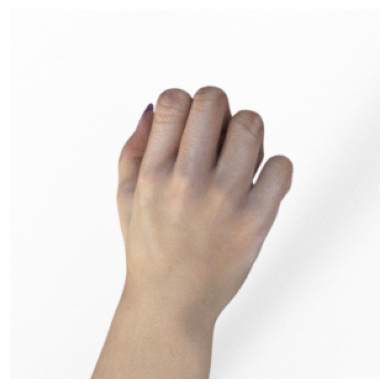

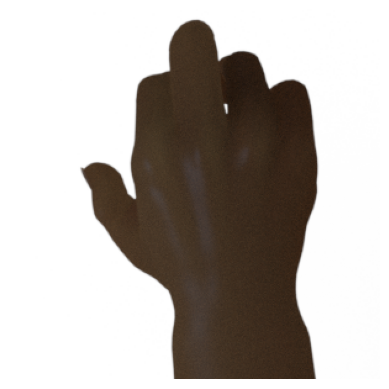

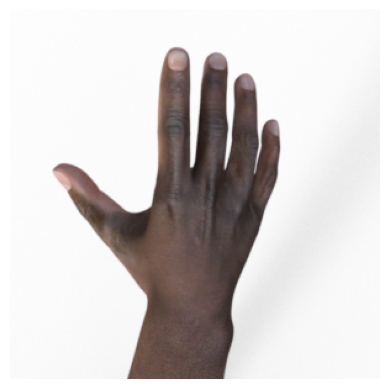

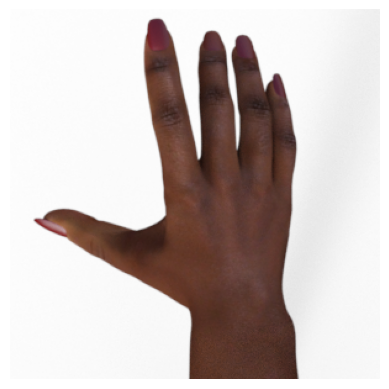

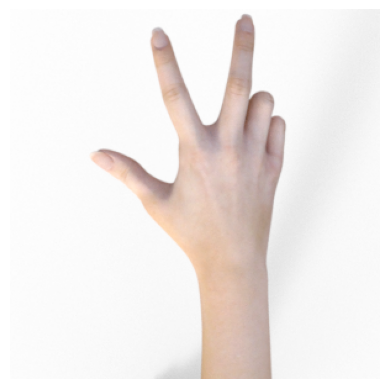

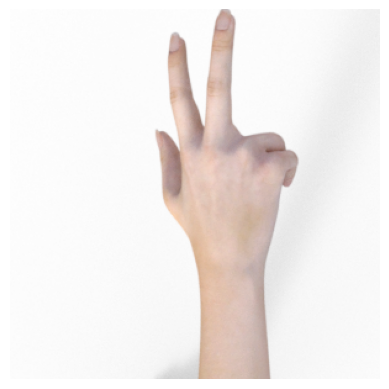

In [6]:
# Let's plot some of the images
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()


Build the model

In [7]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [8]:
# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Prepare the ImageDataGenerator

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = 'tmp/rps-train/rps'
train_datagen = ImageDataGenerator(
    rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

VALIDATION_DIR = 'tmp/rps-test/rps-test-set'
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    target_size=(150, 150),
                                                    class_mode='categorical',
                                                    batch_size=126)

validation_generator = train_datagen.flow_from_directory(VALIDATION_DIR,
                                                    target_size=(150, 150),
                                                    class_mode='categorical',
                                                    batch_size=126)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


Train and evaluate the model

In [10]:
# Train the model
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/25
20/20 [==============================] - 40s 1s/step - loss: 1.2478 - accuracy: 0.3377 - val_loss: 1.0973 - val_accuracy: 0.3333
Epoch 2/25
20/20 [==============================] - 26s 1s/step - loss: 1.0964 - accuracy: 0.3687 - val_loss: 1.1064 - val_accuracy: 0.3333
Epoch 3/25
20/20 [==============================] - 24s 1s/step - loss: 1.0981 - accuracy: 0.4159 - val_loss: 1.0281 - val_accuracy: 0.5188
Epoch 4/25
20/20 [==============================] - 24s 1s/step - loss: 1.0202 - accuracy: 0.4675 - val_loss: 0.8500 - val_accuracy: 0.5618
Epoch 5/25
20/20 [==============================] - 24s 1s/step - loss: 0.9116 - accuracy: 0.5333 - val_loss: 1.1032 - val_accuracy: 0.3898
Epoch 6/25
20/20 [==============================] - 24s 1s/step - loss: 0.9201 - accuracy: 0.5500 - val_loss: 0.8370 - val_accuracy: 0.6048
Epoch 7/25
20/20 [==============================] - 24s 1s/step - loss: 0.7270 - accuracy: 0.6754 - val_loss: 0.5480 - val_accuracy: 0.7527
Epoch 8/25
20/20 [==

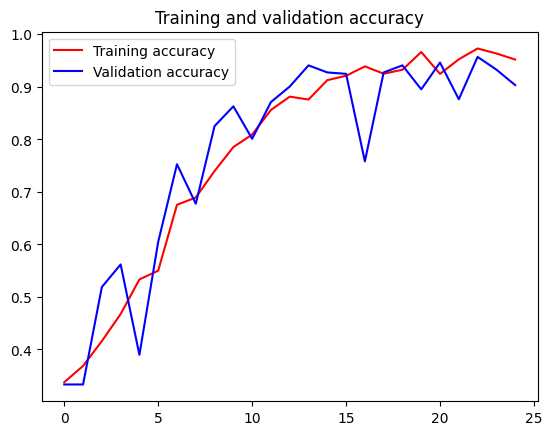

<Figure size 640x480 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

Model Prediction

In [13]:
## NOTE: This may throw error in Safari. Try Chrome in that case

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving paper-hires1.png to paper-hires1 (1).png
Saving paper-hires2.png to paper-hires2.png
Saving paper1.png to paper1.png
Saving paper2.png to paper2.png
Saving paper3.png to paper3.png
Saving paper4.png to paper4.png
Saving paper5.png to paper5.png
Saving paper6.png to paper6.png
Saving paper7.png to paper7.png
Saving paper8.png to paper8.png
Saving paper9.png to paper9.png
Saving rock-hires1.png to rock-hires1.png
Saving rock-hires2.png to rock-hires2.png
Saving rock1.png to rock1.png
Saving rock2.png to rock2.png
Saving rock3.png to rock3.png
Saving rock4.png to rock4.png
Saving rock5.png to rock5.png
Saving rock6.png to rock6.png
Saving rock7.png to rock7.png
Saving rock8.png to rock8.png
Saving rock9.png to rock9.png
Saving scissors-hires1.png to scissors-hires1.png
Saving scissors-hires2.png to scissors-hires2.png
Saving scissors1.png to scissors1.png
Saving scissors2.png to scissors2.png
Saving scissors3.png to scissors3.png
Saving scissors4.png to scissors4.png
Saving scissor

The items in the predictions list correspond to paper, rock, scissors. e.g [[0. 0. 1.]] means that the model predicted scissors.

All the files were coreectly classified.

